In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [18]:
with open('../../output/weights/p_date=2022-09-17-10_35_40/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

40001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [19]:
slice = 118001

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [20]:
def plot(data, title, labelX, labelY):
    interval = 1000
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    
    
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print()
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

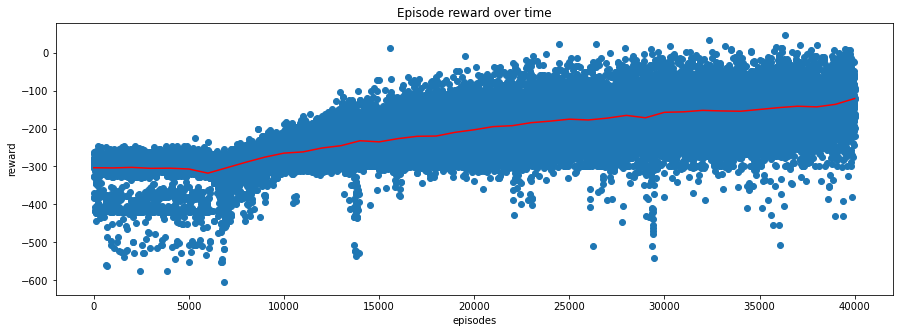

Maximum: 45.400000000000034
Average: -217.11762455938833
Moving Average (simple): {0: -303.3, 1000: -303.8, 2000: -302.4, 3000: -304.9, 4000: -304.5, 5000: -306.6, 6000: -317.6, 7000: -303.2, 8000: -288.8, 9000: -275.3, 10000: -264.8, 11000: -261.6, 12000: -251.3, 13000: -245.2, 14000: -232.2, 15000: -235.2, 16000: -226.6, 17000: -220.5, 18000: -219.8, 19000: -210.0, 20000: -203.3, 21000: -195.0, 22000: -192.5, 23000: -184.6, 24000: -180.5, 25000: -175.4, 26000: -177.5, 27000: -172.6, 28000: -165.4, 29000: -171.7, 30000: -157.3, 31000: -156.1, 32000: -152.2, 33000: -153.7, 34000: -154.5, 35000: -149.8, 36000: -145.0, 37000: -141.3, 38000: -143.0, 39000: -136.2, 40000: -121.0}

Moving Average: []
Minimum: -605.5


In [21]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

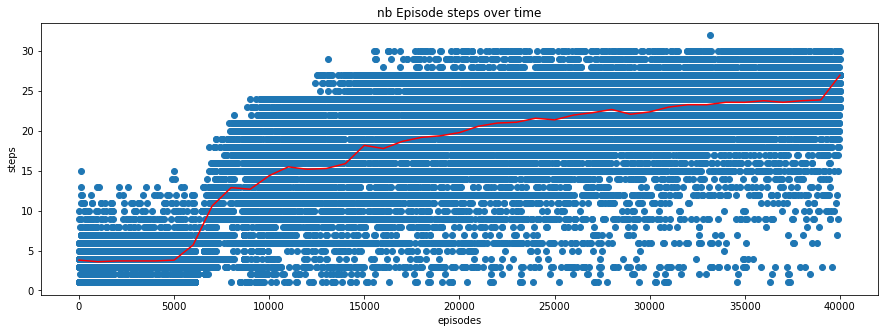

Maximum: 32
Average: 17.070248243793905
Moving Average (simple): {0: 3.8, 1000: 3.6, 2000: 3.7, 3000: 3.7, 4000: 3.7, 5000: 3.8, 6000: 5.7, 7000: 10.6, 8000: 12.9, 9000: 12.7, 10000: 14.4, 11000: 15.5, 12000: 15.2, 13000: 15.3, 14000: 15.9, 15000: 18.2, 16000: 17.8, 17000: 18.7, 18000: 19.2, 19000: 19.4, 20000: 19.8, 21000: 20.6, 22000: 21.0, 23000: 21.1, 24000: 21.6, 25000: 21.4, 26000: 22.0, 27000: 22.3, 28000: 22.7, 29000: 22.1, 30000: 22.4, 31000: 23.0, 32000: 23.3, 33000: 23.3, 34000: 23.6, 35000: 23.6, 36000: 23.8, 37000: 23.6, 38000: 23.8, 39000: 23.9, 40000: 27}

Moving Average: ['-5% (3.6 | -5%)', '+2% (3.7 | -2%)', '0% (3.7 | -2%)', '0% (3.7 | -2%)', '+2% (3.8 | 0%)', '+50% (5.7 | 50%)', '+85% (10.6 | 178%)', '+21% (12.9 | 239%)', '-1% (12.7 | 234%)', '+13% (14.4 | 278%)', '+7% (15.5 | 307%)', '-1% (15.2 | 299%)', '+0% (15.3 | 302%)', '+3% (15.9 | 318%)', '+14% (18.2 | 378%)', '-2% (17.8 | 368%)', '+5% (18.7 | 392%)', '+2% (19.2 | 405%)', '+1% (19.4 | 410%)', '+2% (19.8 | 421

In [22]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

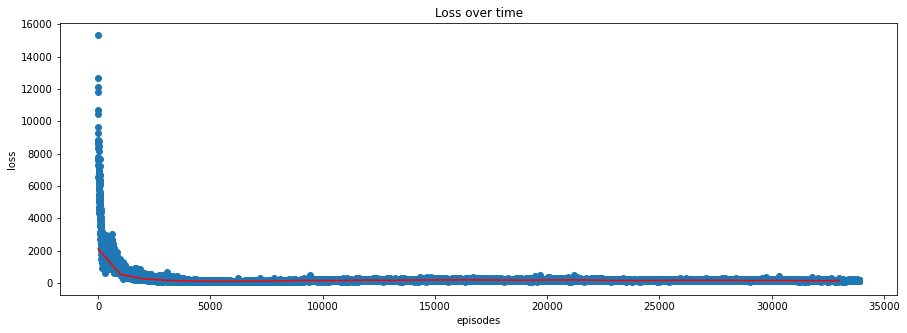

Maximum: 15308.577311197916
Average: 222.64288134859177
Moving Average (simple): {0: 2100.3, 1000: 519.0, 2000: 254.5, 3000: 164.1, 4000: 111.2, 5000: 92.4, 6000: 93.3, 7000: 98.9, 8000: 113.6, 9000: 154.5, 10000: 143.8, 11000: 147.6, 12000: 169.9, 13000: 152.9, 14000: 174.4, 15000: 181.6, 16000: 184.1, 17000: 183.0, 18000: 176.4, 19000: 163.6, 20000: 180.8, 21000: 180.2, 22000: 171.7, 23000: 149.5, 24000: 144.7, 25000: 153.6, 26000: 158.7, 27000: 159.5, 28000: 159.2, 29000: 145.5, 30000: 151.7, 31000: 142.6, 32000: 141.0, 33000: 140.8}

Moving Average: ['-75% (519.0 | -75%)', '-50% (254.5 | -87%)', '-35% (164.1 | -92%)', '-32% (111.2 | -94%)', '-16% (92.4 | -95%)', '+0% (93.3 | -95%)', '+6% (98.9 | -95%)', '+14% (113.6 | -94%)', '+36% (154.5 | -92%)', '-6% (143.8 | -93%)', '+2% (147.6 | -92%)', '+15% (169.9 | -91%)', '-10% (152.9 | -92%)', '+14% (174.4 | -91%)', '+4% (181.6 | -91%)', '+1% (184.1 | -91%)', '0% (183.0 | -91%)', '-3% (176.4 | -91%)', '-7% (163.6 | -92%)', '+10% (180.8 | 

In [23]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")